<a href="https://colab.research.google.com/github/bhardwaj0027/Deep-Learning-CSL312/blob/main/Experiment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 [==============================] - 33s 0us/step


In [ ]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


In [ ]:
X_train = X_train.reshape((X_train.shape[0], 32, 32, 3)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 32, 32, 3)).astype('float32') / 255


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
history = model.fit(X_train, y_train, epochs=10 , validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
1250/1250 [==============================] - 74s 57ms/step - loss: 0.9659 - accuracy: 0.6616 - val_loss: 0.9796 - val_accuracy: 0.6592
Epoch 2/10
1250/1250 [==============================] - 71s 57ms/step - loss: 0.8674 - accuracy: 0.6952 - val_loss: 0.9455 - val_accuracy: 0.6735
Epoch 3/10
1250/1250 [==============================] - 69s 55ms/step - loss: 0.8005 - accuracy: 0.7209 - val_loss: 0.9401 - val_accuracy: 0.6803
Epoch 4/10
1250/1250 [==============================] - 74s 59ms/step - loss: 0.7595 - accuracy: 0.7343 - val_loss: 0.8960 - val_accuracy: 0.6863
Epoch 5/10
1250/1250 [==============================] - 75s 60ms/step - loss: 0.7052 - accuracy: 0.7527 - val_loss: 0.9193 - val_accuracy: 0.6902
Epoch 6/10
1250/1250 [==============================] - 71s 57ms/step - loss: 0.6635 - accuracy: 0.7667 - val_loss: 0.9002 - val_accuracy: 0.6959
Epoch 7/10
1250/1250 [==============================] - 71s 57ms/step - loss: 0.6284 - accuracy: 0.7779 - val_loss: 0.9224 -

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("\nTest Accuracy: {:.2f}%".format(test_accuracy * 100))

313/313 [==============================] - 6s 18ms/step - loss: 0.9219 - accuracy: 0.7024

Test Accuracy: 70.24%


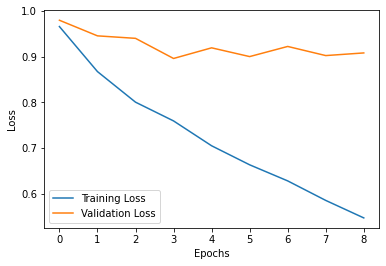

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()